<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" width=50 height=50 align="right"/>

## DSI Instructor Challenge

#### Dustin Pierce: Candidate for DSI Instructor lead
----------------------------------------

# Part 1

## Python Coding and Data Set

In [1]:
# package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read in the raw data (`breast-cancer.csv`) and header (`field_names.txt`)

In [2]:
# raw data imports
!curl --output breast-cancer.csv 'https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/breast-cancer.csv'
!curl --output field_names.txt 'https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/field_names.txt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  121k  100  121k    0     0   406k      0 --:--:-- --:--:-- --:--:--  408k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   527  100   527    0     0   3293      0 --:--:-- --:--:-- --:--:--  3293


#### Read in raw breast cancer data and assign header
------------------

In [3]:
# NOTES:
# (1) import csv as pandas data frame
# (2) set header to None (otherwise an observation becomes default header)
df = pd.read_csv("breast-cancer.csv", header = None)

# NOTES:
# (1) .txt files can be read in with pd.read_csv if sep parameter correctly specified
# (2) obtain pandas series which can be re-assigned to column names in data
header = pd.read_csv("field_names.txt", sep = " ", header = None)[0]       # using '[0]' to get pd series

# assign header labels as column names in data
df.columns = header
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Compute mean and median smoothness and compactness for benign and malignant tumors
--------------------

In [4]:
##### Quick check and housekeeping before proceeding #####

# check unique values and no. of occurrences of each value 
print(df.diagnosis.value_counts())                      # NOTE: in raw data "M" denotes malignant and "B" denotes benign

# re-assign target to numeric, binary outcome
df["diagnosis"] = np.where(df["diagnosis"]== 'M', 1, 0) # malignant = 1, benign = 0

# confirm re-assignment
print(df.diagnosis.value_counts())


B    357
M    212
Name: diagnosis, dtype: int64
0    357
1    212
Name: diagnosis, dtype: int64


In [5]:
# check missing values and summary statistics for data
print(df.isna().sum().sum())               # = 0, there are no missing values in the data

# summary statistics of entire dataset
df.describe()                          

0


,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
############################
# means for malignant/benign
############################

df.groupby(['diagnosis']).mean()[['smoothness_mean','compactness_mean']]


,smoothness_mean,compactness_mean
diagnosis,,
0,2.000321,0.021438
1,4.323929,0.032281


In [7]:
###############################
# medians for malignant/benign
###############################

df.groupby(['diagnosis']).median()[['smoothness_mean','compactness_mean']]

# COMMENTS:
# (1) malignant tumors ~ 2x as compact as benign tumors on average
# (2) malignant tumors ~ 2x as smooth as benign tumors on average

,smoothness_mean,compactness_mean
diagnosis,,
0,1.8510,0.01631
1,3.6795,0.02859


#### Write a function to generate bootstrap samples of the data
------------

In [27]:
def bootstrap_sample(data, size):
    sample = np.random.choice(len(data), replace = True, size = size)
    result_df = data.iloc[sample]
    return result_df

# test function
bootstrap_sample(df, size = 100)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
75,8610404,1,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,...,19.77,24.56,128.80,1223.0,0.1500,0.20450,0.2829,0.15200,0.2650,0.06387
297,892189,1,11.76,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,...,13.36,23.39,85.10,553.6,0.1137,0.07974,0.0612,0.07160,0.1978,0.06915
15,84799002,1,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,...,17.46,37.13,124.10,943.2,0.1678,0.65770,0.7026,0.17120,0.4218,0.13410
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.74,39.42,184.60,1821.0,0.1650,0.86810,0.9387,0.26500,0.4087,0.12400
203,87880,1,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,...,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.4646,0.20130,0.4432,0.10860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.36820,0.2678,0.15560,0.3196,0.11510
502,91505,0,12.54,16.32,81.25,476.3,0.11580,0.10850,0.05928,0.03279,...,13.57,21.40,86.67,552.0,0.1580,0.17510,0.1889,0.08411,0.3155,0.07538
39,855138,1,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,...,15.53,26.02,107.30,740.4,0.1610,0.42250,0.5030,0.22580,0.2807,0.10710
13,846381,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,16.84,27.66,112.00,876.5,0.1131,0.19240,0.2322,0.11190,0.2809,0.06287


## Exploratory Analysis

#### Identify variables that are predictive of a malignant tumor

In [8]:
###########################################################################
# Method 1: Identify high (+) or (-) correlations, using 0.75 as threshold
###########################################################################
# NOTES:
# (1) excluding ID var becuase this is not a predictor
# (2) there are no moderate or strong (-) correlations 

# mask for features with correlation > 0.75 w.r.t response var (< 1 excludes response var);
corr_mask = (df.loc[:, df.columns != 'ID'].corr()["diagnosis"] > 0.75) & (df.loc[:, df.columns != 'ID'].corr()["diagnosis"] < 1)

# apply mask to features except ID
df.loc[:, df.columns != 'ID'].corr()["diagnosis"][corr_mask].sort_values(ascending = False)

# Conclusions:
# i. fractal_dimension_mean and concavity_worst are "good" candidates for strong predictors
# because of the strong (+) correlation with the target variable; fractal dimension is a 
# known diagnostic factor in Breast Cancer (reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6349609/)

# ii. concave_points_sd_error and perimeter_sd_error should be considered more carefully
# because these are (assumed to be) errors associated with concavity_worst/concave_points_mean
# and perimeter_mean/perimeter_worst respectively; 


0
fractal_dimension_mean     0.793566
concave_points_sd_error    0.782914
perimeter_sd_error         0.776614
concavity_worst            0.776454
Name: diagnosis, dtype: float64

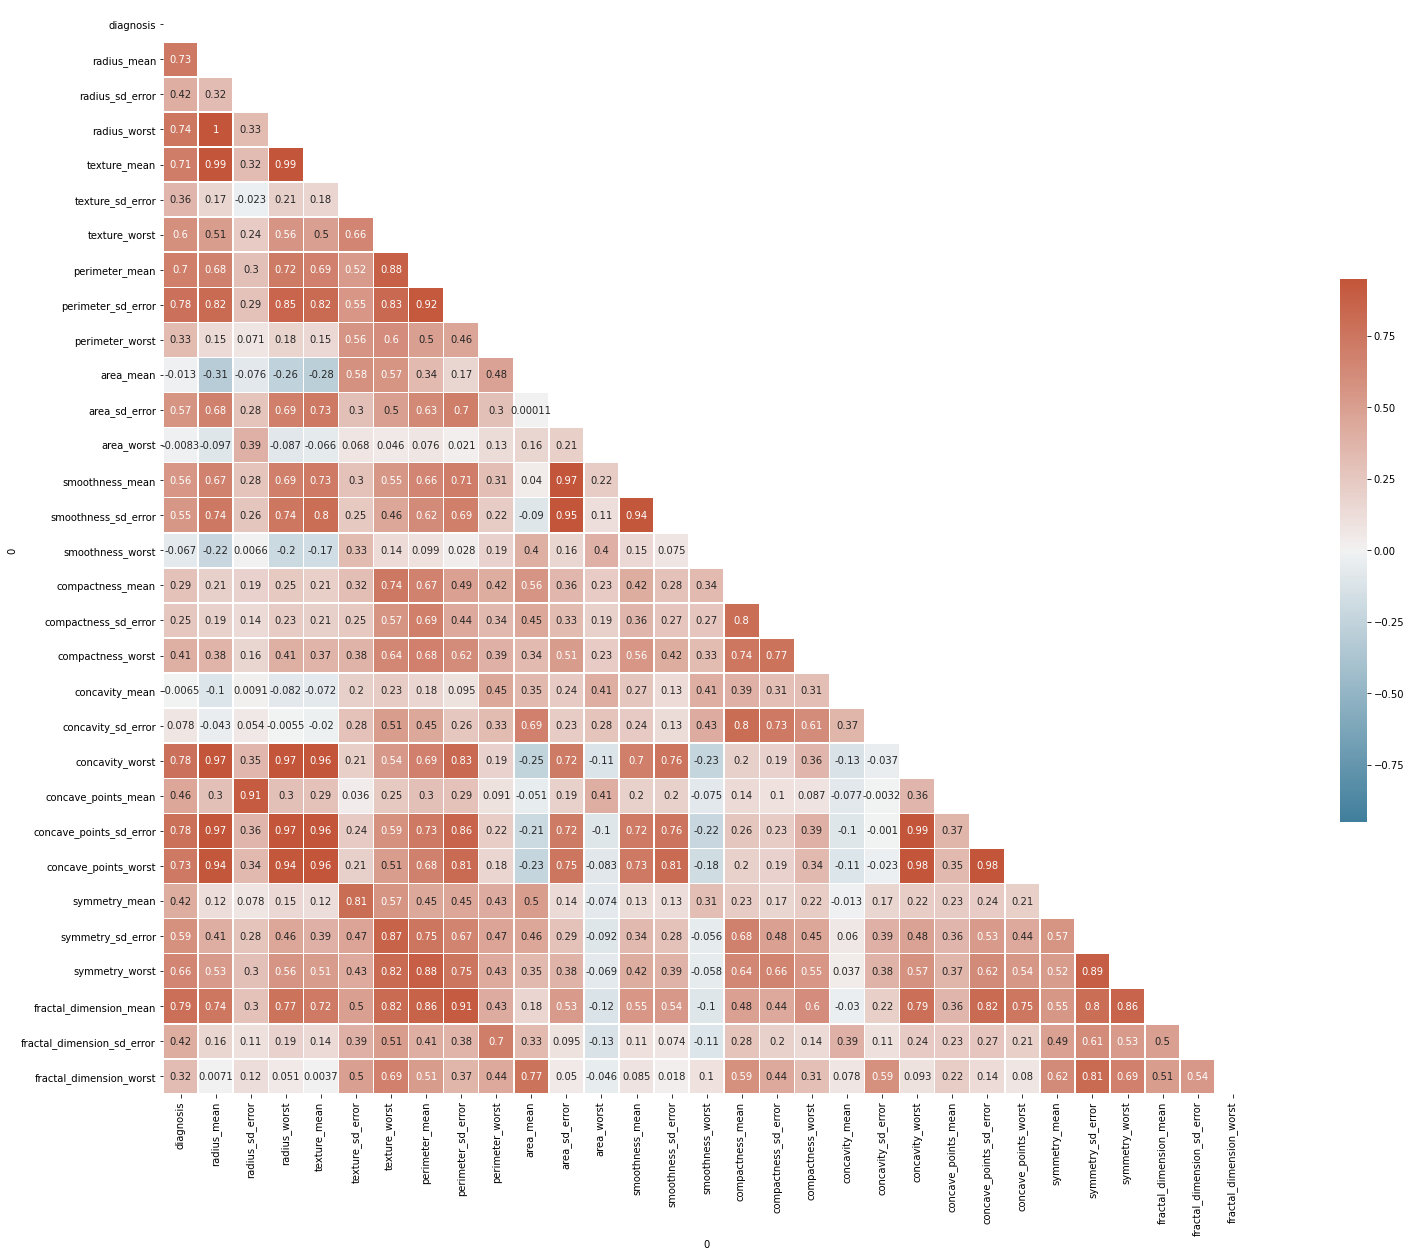

In [9]:
###########################################
# Create correlation plot of all variables
###########################################
# reference: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Compute the correlation matrix
corr = df.loc[:, df.columns != 'ID'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(32,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= 0.95, vmin = -0.95, annot=True,
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
# define feature and target datasets
X = df.loc[:, (df.columns != 'diagnosis') & (df.columns != 'ID')]
y = df["diagnosis"]

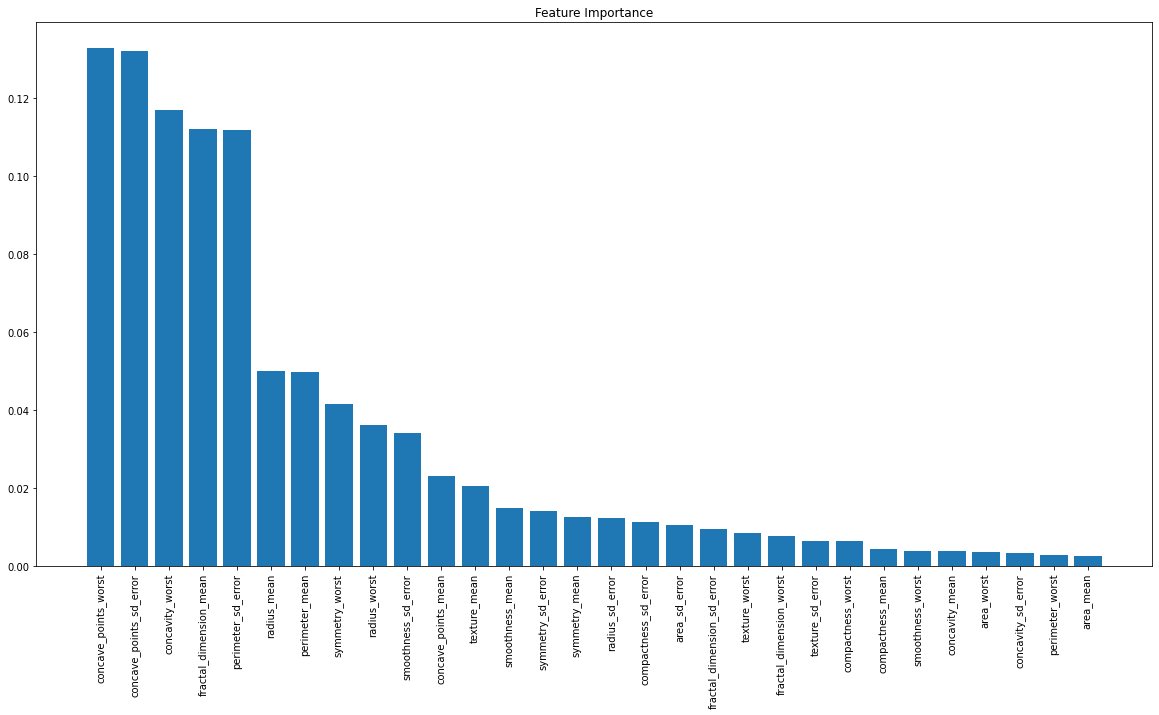

In [11]:
##########################################################################################
# Method 2: Fit random forest model to determine relative importance using gini criterion
##########################################################################################
from sklearn.ensemble import RandomForestClassifier
## reference: https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/

# define the model
rf = RandomForestClassifier(random_state = 500)

# fit the model
rf.fit(X, y)

# get importance
rf_importance = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(rf_importance)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20,10))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), rf_importance[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation = 90)

# Show plot
plt.show()

# COMMENTS:
# (1) fractal_dimension_mean and concavity_worst appear in top 4 most important features
# (2) in addition, include concave_points_worst with strong predictors
# (3) similar to above, hesistant to include concave_points_sd_error in answer as this
#     is assumed to be a feature measuring the error of the concave_points

Text(0.5, 1.0, 'Feature importance using Lasso Model')

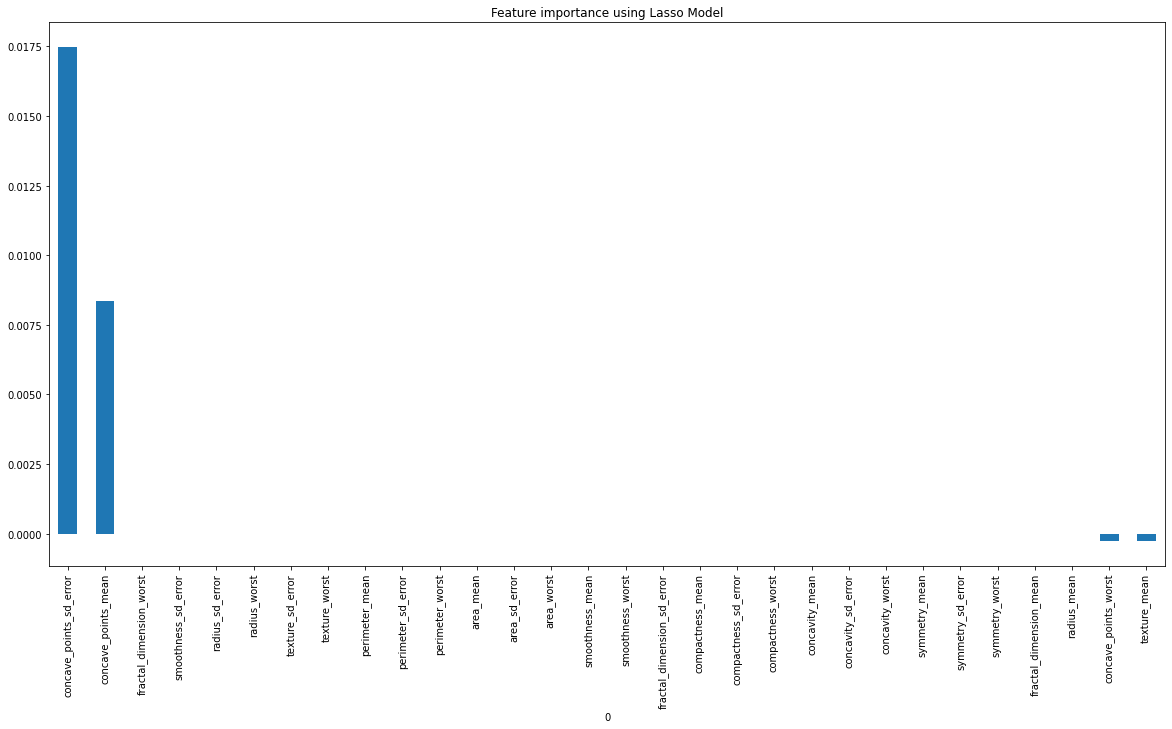

In [12]:
################################
# Method 3: Lasso regularization
################################
## reference: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
from sklearn.linear_model import LassoCV

reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)

plt.figure(figsize=(20,10))
imp_coef = coef.sort_values(ascending = False)
imp_coef.plot(kind = "bar")
plt.title("Feature importance using Lasso Model")

# COMMENTS:
# (1) concave_points features (worst, mean and sd_error) top 3 of 4 non-zero'd features
# (2) first appearance of texture_mean as top feature

#### ANSWER:

* concave_points_mean
* fractal_dimension_mean
* concavity_worst

**Why?** These were the features that satisfied at least 2 of the 3 metrics for assessing importance. As stated above, including an error term seemed ill-advised given the *assumed* defintions of the variables. The variables were selected as independently as possible, i.e. only select one feature for each general label such as `concave`, `concavity`, etc. Lastly, the listed features are known diagnostic factors for breast cancer.

## Modeling

* Build a model to predict the malignant tumors.
* Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
* Identify how you would control for overfitting in each classification technique.
* Evaluate the performance of each model.
* In each model, identify the most important predictive variables and explain how you identified them.


In [13]:
# Up sample minority class (i.e. balance classes)
## reference: https://elitedatascience.com/imbalanced-classes

# create data frames for each diagnosis category
df_malignant = df[df.diagnosis == 1]             # patients with diagnosis == 1 (malignant)
df_benign = df[df.diagnosis == 0]                # patients with diagnosis == 0 (benign)

from sklearn.utils import resample

# Upsample minority class
df_malignant_upsampled = resample(df_malignant, 
                                  # sample with replacement
                                  replace = True,
                                  # to match majority class
                                  n_samples = df_benign.shape[0],
                                  # set random seed
                                  random_state = 500)

df_balanced = pd.concat([df_benign, df_malignant_upsampled]).drop("ID", axis=1)

# confirm balanced classes
print(df_balanced["diagnosis"].value_counts())     # N = 357 for each outcome

1    357
0    357
Name: diagnosis, dtype: int64


#### Gridsearch to tune models: Logistic regression and Support vector machine 

In [14]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# create datasets for model training
X_balanced = df_balanced.loc[:, df_balanced.columns != 'diagnosis']
y_balanced = df_balanced["diagnosis"]

#### Models: logsitic regression and support vector machine
logit = LogisticRegression()
svm = SVC(kernel='linear')

# tuning parameters
penalty_values = ['l1', 'l2',]        # logistic only
C_values = [0.1, 1, 10, 100]          # logistic and SVM
gamma_values = [0.001, 0.01, 0.1, 1]  # SVM only

######################################################
# parameters to search over for logisitc regression
logit_hyperparams = {"C": C_values, "penalty": penalty_values}
# carry out the actual search
logit_search = GridSearchCV(logit, logit_hyperparams, cv = 5, verbose = 1)
# fit to data
logit_best = logit_search.fit(X_balanced, y_balanced)
print(logit_best.best_estimator_.get_params())
print("---------------------------------------")

######################################################
# parameters to search over for support vector machine
svm_hyperparams = {"C": C_values, "gamma": gamma_values}
# carry out the actual search
svm_search = GridSearchCV(svm, svm_hyperparams, cv = 5, verbose = 1)
# fit to data
svm_best = svm_search.fit(X_balanced, y_balanced)
print(svm_best.best_estimator_.get_params())

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 100, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
---------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.2min finished


{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [15]:
# partition data for cross-validation
cv = KFold(n_splits = 5, random_state = 500, shuffle = False)
#################################################################
#################################################################
#################################################################
# create logistic regression classifier (using results of gridsearch)
logit = LogisticRegression(C = 100, penalty = "l2")

# evaluate
logit_scores = cross_val_score(logit, X_balanced, y_balanced, scoring = 'accuracy', cv = cv)

# accuracy
print("Logistic regression model: ")
print("-----------------------------------")
print("Accuracy: ", logit_scores)

#################################################################
#################################################################
#################################################################
# create support vector classifier (using results of gridsearch)
svc = SVC(kernel = "linear", C = 1, gamma = 0.001)

# evaluate model
svc_scores = cross_val_score(svc, X_balanced, y_balanced, scoring='accuracy', cv = cv)

# report performance
print(" ")
print("Support vector machine model: ")
print("-----------------------------------")
print("Accuracy: ", svc_scores)

# Comments:
# (1) metrics relatively stable across folds

Logistic regression model: 
-----------------------------------
Accuracy:  [0.97202797 0.91608392 0.93706294 0.86013986 0.92957746]
 
Support vector machine model: 
-----------------------------------
Accuracy:  [0.96503497 0.93706294 0.95104895 0.91608392 0.94366197]


## Explanation

**To Technical Audiences**: 
* Explain the limitations of your analysis and identify possible further steps you could take.

**To Non-Technical Audiences**:
* Write a short summary of your analysis, explaining how your model works and how it performs.
* Briefly explain the factors that contributed to malignant vs benign tumor identification

#### Technical Audiences

There are a few elements that could be incorporated into this notebook to expand the analysis:

1. Variable selection should be re-visited and formalized. I did not formally test the hypothesis that the features relating to standard error were confounders in the data. This matters because the assumption of independence is used in a lot of alogrithms.

2. Instead of using upsampling to balance classes, it may be worthwhile to apply the SMOTE (synthetic minority oversampling technique) algorithm to obtain better data for the machine learning task; moreover, it stands to reason that it would be useful to fit the models and compute metrics *without* balancing classes as an anchor to measure the relative improvement of re-sampling.

3. From a logisitcs perspective, the bulk (if not all) of the transformation and modeling steps could be carried out with a pipeline. This would allow for any number of changes and seamless re-execution of the related tasks (e.g. change the grid search parameters).

4. While the variable importance assessment may have been adequate for this application (given the high accuracy in the models, etc.), there is more room to assess the specific roles of the variables and the relationships to the data. A worthwhile endeavor would be a statistical or emprirical search (e.g.recursive feature elimination) over the feature set to programmatically determine which features could potentially be eliminated by using statistical tests.

5. If the performance of the algorithms had been lower than desired, I would have scaled the data. I work in the clinical trial, healthcare and biotechnology domains and in those spaces there are varying reasons why patient/medical outcomes data cannot be scaled. So, if an adequate metric can be obtained from unscaled data then that is a desirable approach. However, scaled data should be assessed and measured against the original solution.  

#### Non-Technical Audiences

The goal of the analysis was to write a program to detect whether or not the information from measurements of breast cells were malignant (cancerous) or benign. In order to achieve this goal, steps were taken to assess which specific measurements provided the most relevant information to detect cancer. The techniques used in this analysis showed that fractal dimension, concavity, and concave points provided the most information for detection. These findings are consistent with known medical diagnostic factors.

After this first portion of the analysis, machine learning algorthims were applied to the data to predict the outcome (cancerous cells or benign cells). The algorithms selected for this task attempt to mathematically separate the 2 groups by placing each patient on one side of a decision boundary (cancer or no cancer) based on the available data. All of the avaialble information was used for the models. In order to develop a robust solution, a series of experiments were performed -- referred to as cross validation -- to confirm the results were consistent across different subsets of the data; and, in this project, the results were stable across experiments. The algorithms acheived an average accuracy of ~93-94%, meaning that given a set of breast cell measurements the model can correctly predict the status in ~94% of cases. 

# Part 2
--------------

#### Explore data before reviewing student's code.

In [16]:
# import data
!curl --output train.csv "https://gist.githubusercontent.com/jeff-boykin/9e1a450ef152604e6830ce70f4fc1be8/raw/4d42aebc2c2d3f7528a7769248720918e14f2e03/part-2-data.train.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.2M  100 16.2M    0     0  12.4M      0  0:00:01  0:00:01 --:--:-- 12.4M


In [17]:
data = pd.read_csv("train.csv")
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [18]:
data.describe(include ='all')

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
count,1.000000e+04,9999,10000,10000,10000,3556,4737,5951,10000,10000,10000.000000,10000
unique,NaN,8273,9940,2399,899,2,2,1197,28,5780,NaN,74
top,NaN,Staff Nurse,Would you like a rewarding career within the h...,London,UK,full_time,permanent,JOBG8,Healthcare & Nursing Jobs,32 to 55 per hour,NaN,careworx.co.uk
freq,NaN,78,5,637,1337,2978,4132,449,3149,51,NaN,2946
mean,5.888356e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31522.615600,NaN
std,7.383340e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16153.358741,NaN
min,1.261263e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5184.000000,NaN
25%,5.540841e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20648.500000,NaN
50%,6.200580e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27500.000000,NaN
75%,6.479651e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37500.000000,NaN


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  10000 non-null  int64 
 1   Title               9999 non-null   object
 2   FullDescription     10000 non-null  object
 3   LocationRaw         10000 non-null  object
 4   LocationNormalized  10000 non-null  object
 5   ContractType        3556 non-null   object
 6   ContractTime        4737 non-null   object
 7   Company             5951 non-null   object
 8   Category            10000 non-null  object
 9   SalaryRaw           10000 non-null  object
 10  SalaryNormalized    10000 non-null  int64 
 11  SourceName          10000 non-null  object
dtypes: int64(2), object(10)
memory usage: 937.6+ KB


### Student 1 Feedback
---------

```
import pandas as pd
import numpy as np
from sklearn import LinearRegression    # [DP] This line throws an error; LinearRegression                                             # lives in library called 'sklearn.linear_model'
from sklearn.cross_validation import cross_val_score   
                                        # [DP] This line throws an error; cross_val_score                                             # lives in library called 'sklearn.model_selection'

# Load data
d = pd.read_csv('../data/train.csv')    # [DP] May want to consider a modification to load                                             # data directly from web source or working directory; e.g. https://stackoverflow.com/questions/15138614/how-can-i-read-the-contents-of-an-url-with-python                                  # PRO-TIP: Try to make your notebooks as "portable" as                                         # possible; if someone uses your code ideally the                                             # data imports should still work


# Setup data for prediction             # [DP] What question do you wish to answer? 
                                        #      Is the data appropriately structured?
x1 = data.SalaryNormalized              # [DP] Is x1 the response/target?
x2 = pd.get_dummies(data.ContractType)  # [DP] Applying get_dummies() to a categorical                                                 # variable is often a good idea. For binary outcome,                                           # you can directly re-assign the labels instead of                                             # creating new columns. Also, in this case, the                                               # variable has a high % of missingness so you may want                                         # to drop from analysis. You can check the percent                                             # missingness with a check like this:                                               (data.ContractType.isna().sum()/data.ContractType.shape[0])*100,                                         # This is sum of NA's divided by no. of observations
                                        # General tip: call .describe(), .info() or check NA's
                                        # to understand data 1st

# Setup model
model = LinearRegression()              # [DP] Are assumptions of linear regression met? 

# Evaluate model
from sklearn.cross_validation import cross_val_score
                                        # [DP] This command is executed twice, only need 1
from sklearn.cross_validation import train_test_split
                                        # [DP] Now that you have train_test_split imported,                                           # you can call the method to split your data. e.g,
# X_train,X_test,y_train,y_test = train_test_split(x1,x2, train_size = 0.8, random_state=123)
                                        # which will give an 80%-20% partition of the data.
                                        # You are welcome to use cross_val_score too.
                                        
                                        
                                        # [DP] Why cv = 1? 
                                        # [DP] 'mean_absolute_error' is not a scoring option;                                         # can use neg_mean_absolute_error "Mean absolute                                               # regression loss"; RMSE is another option, see                                               # sklearn.metrics.mean_squared_error

scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

[DP] Overall advice: 
(1) Make sure that code does not error out for any reason
(2) Check package imports, e.g. sklearn.model_selection versus cross_validation
(3) Keep the data science question in mind. What are you try to accomplish and how can your code/data help you answer the question
(4) Add in EDA checks before fitting any model. Check NA's, data types, and summary statistics
(5) Think about how others may read or use your code in the future; it's a great exercise to try to make all of your projects "defensive" (hard to break or misuse) and "reproducible" (someone else using your code can get the same results as you). 
```

*I would also ask the student to go through this with me in person (or on a call in the case of online learning) as well. That is an essential part of my process. I like to pose questions, give technical suggestions and then have a discussion or working session to resolve the specific details.*

### Student 2 Feedback

```
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

```

Similar comments as Student 1 except `from sklearn.linear_model import LinearRegression` is the correct command. Otherwise, the comments are the same with regards to importing `cross_val_score`, loading the data, and the use of `ContractType` as a potential dummy variable. The variable names `y` and `x` are more aligned with typical target / response variable naming conventions (although this is not required). Another added improvement of Student 2 is the use of `cv = 5` in the cross-validation step -- although 'mean_absolute_error' is not a valid value for the `scoring` parameter. 

As I mentioned in the first question, *I would also ask the student to go through this with me in person (or on a call in the case of online learning)*